<a href="https://colab.research.google.com/github/Kehindeajayi01/American-Sign-Language/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load the data from the datasets in tensorflow

In [0]:
import tensorflow as tf
from tensorflow import keras

from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Explore the data
- Check the shape of the training and test data
- view at least one image in the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt

train_images.shape, train_labels.shape, train_images[0][:5]

((60000, 28, 28),
 (60000,),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3]], dtype=uint8))

## Preprocess the training and test images
- The images are stored as integers from 1 to 255
- We convert it to a float
- We convert it to [0, 1]
- We can visualize the images 

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']  # store the target names of the images

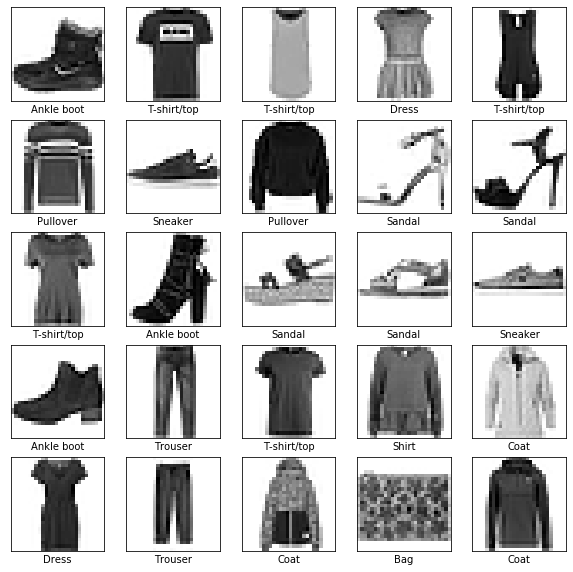

In [6]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


## Build the architecture
- Create the model
- Add fully connected layers including the output layer

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
                    Flatten(input_shape = (28, 28)),
                    Dense(128, activation = 'relu'),
                    Dense(128, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

## Compile the model
- Specify the optimizer (e.g. adam, rmsprop)
- Specify the loss (categorical_crossentropy)
- Specify the metrics (accuracy)

In [0]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Fit the model and Evaluate it on the test data
- Specify the epochs
- Specify the batch size

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.8486 - acc: 0.6915
Epoch 2/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.5579 - acc: 0.7972
Epoch 3/10
60000/60000 [==============================] - 7s 122us/step - loss: 0.4923 - acc: 0.8230
Epoch 4/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.4519 - acc: 0.8375
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.4245 - acc: 0.8468
Epoch 6/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.4063 - acc: 0.8534
Epoch 7/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.3896 - acc: 0.8588
Epoch 8/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.3790 - acc: 0.8628
Epoch 9/10
60000/60000 [==============================] - 7s 120us/step - loss: 0.3667 - acc: 0.8680
Epoch 10/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.3574 - a

## Evaluate the model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy: {:.3f}".format(test_acc))

10000/10000 [==============================] - 0s 41us/step
Test accuracy: 0.854


## Using a basic Convolutional Neural Network for the same task
- here, I want to use just three convnets and pooling layers before training a fully connected layers on it.
- First, we need to reshape the images into 3D tensor of shape (height, width, and color_channel). Since the image is in black-and-white format, we use a color_channel of 1, else 3 for rgb.
- We also convert it to a float ranging from 0 to 1.

In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))    # reshaping to a 3D shape
train_images = train_images.astype('float32')/255  # converting to a float of range [0, 1]

test_images = test_images.reshape((10000, 28, 28, 1))    # reshaping to a 3D shape
test_images = test_images.astype('float32')/255  # converting to a float of range [0, 1]

## Preprocess the labels
- Here, we have 10 classes so we need to put the labels into 10 classes

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Building our architectures

In [31]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential

model = Sequential([
                    Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)),
                    MaxPooling2D((2,2)),
                    Conv2D(64, (3,3), activation = 'relu'),
                    MaxPooling2D((2,2)),
                    Conv2D(64, (3,3), activation = 'relu'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

## Compile the model

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## Fitting the model

In [33]:
model.fit(train_images, train_labels, epochs = 5, batch_size = 64)

Epoch 1/5
60000/60000 [==============================] - 48s 808us/step - loss: 0.5945 - acc: 0.7813
Epoch 2/5
60000/60000 [==============================] - 48s 807us/step - loss: 0.3742 - acc: 0.8627
Epoch 3/5
60000/60000 [==============================] - 48s 805us/step - loss: 0.3188 - acc: 0.8836
Epoch 4/5
60000/60000 [==============================] - 48s 799us/step - loss: 0.2961 - acc: 0.8933
Epoch 5/5
60000/60000 [==============================] - 48s 797us/step - loss: 0.2773 - acc: 0.9002


## Evaluate the model

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("The test accuracy is: ", test_acc)

10000/10000 [==============================] - 3s 278us/step
The test accuracy is:  0.8676
